In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


C:\Users\LAKSHMI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the UCI Heart Disease Dataset
df = pd.read_csv("UCI Heart Disease Dataset.csv")

# Display the first few rows
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     1       0  
1   3     0       1  
2   2     2       1  
3   0     0       0  
4   0     0       0  


In [3]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Impute missing values (if any) with the mean
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :] = imputer.fit_transform(df)

print("Missing values after imputation:\n", df.isnull().sum())


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Identify categorical columns
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']  # Example: Adjust these as needed
encoder = OneHotEncoder(sparse=False, drop='first')

# Apply OneHotEncoding to categorical features
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                                 columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded features
df = pd.concat([df.drop(columns=categorical_cols), encoded_features], axis=1)

print("Data after encoding:\n", df.head())


Data after encoding:
    age  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  sex_1  cp_2  \
0   63       145   233    1      150      0      2.3   0       0    1.0   0.0   
1   67       160   286    0      108      1      1.5   3       1    1.0   0.0   
2   67       120   229    0      129      1      2.6   2       1    1.0   0.0   
3   37       130   250    0      187      0      3.5   0       0    1.0   0.0   
4   41       130   204    0      172      0      1.4   0       0    0.0   1.0   

   cp_3  cp_4  restecg_1  restecg_2  slope_2  slope_3  thal_1  thal_2  
0   0.0   0.0        0.0        1.0      0.0      1.0     1.0     0.0  
1   0.0   1.0        0.0        1.0      1.0      0.0     0.0     0.0  
2   0.0   1.0        0.0        1.0      1.0      0.0     0.0     1.0  
3   1.0   0.0        0.0        0.0      0.0      1.0     0.0     0.0  
4   0.0   0.0        0.0        1.0      0.0      0.0     0.0     0.0  


C:\Users\LAKSHMI\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Replace with actual numerical column names
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data after scaling:\n", df.head())


Data after scaling:
         age  trestbps      chol  fbs   thalach  exang   oldpeak  ca  target  \
0  0.936181  0.750380 -0.276443    1  0.017494      0  1.068965   0       0   
1  1.378929  1.596266  0.744555    0 -1.816334      1  0.381773   3       1   
2  1.378929 -0.659431 -0.353500    0 -0.899420      1  1.326662   2       1   
3 -1.941680 -0.095506  0.051047    0  1.633010      0  2.099753   0       0   
4 -1.498933 -0.095506 -0.835103    0  0.978071      0  0.295874   0       0   

   sex_1  cp_2  cp_3  cp_4  restecg_1  restecg_2  slope_2  slope_3  thal_1  \
0    1.0   0.0   0.0   0.0        0.0        1.0      0.0      1.0     1.0   
1    1.0   0.0   0.0   1.0        0.0        1.0      1.0      0.0     0.0   
2    1.0   0.0   0.0   1.0        0.0        1.0      1.0      0.0     0.0   
3    1.0   0.0   1.0   0.0        0.0        0.0      0.0      1.0     0.0   
4    0.0   1.0   0.0   0.0        0.0        1.0      0.0      0.0     0.0   

   thal_2  
0     0.0  
1     0.0  

In [6]:
# Split data into features (X) and target (y)
X = df.drop(columns=['target'])  # Replace 'target' with the actual target column name
y = df['target']

# Check the distribution of target classes
print("Target class distribution:\n", y.value_counts())

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after resampling
print("Target class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())


Target class distribution:
 target
0    160
1    137
Name: count, dtype: int64
Target class distribution after SMOTE:
 target
0    160
1    160
Name: count, dtype: int64


In [7]:
# Example: Creating a new feature (Risk Factor)
df['risk_factor'] = df['age'] * df['chol'] / df['trestbps']

# Check the correlation of the new feature with the target variable
print("Correlation with target:\n", df.corr()['target'].sort_values(ascending=False))


Correlation with target:
 target         1.000000
cp_4           0.507035
thal_2         0.484657
ca             0.463189
oldpeak        0.424052
exang          0.421355
slope_2        0.349635
sex_1          0.278467
age            0.227075
restecg_2      0.157440
trestbps       0.153490
thal_1         0.104651
chol           0.080285
restecg_1      0.067672
slope_3        0.060950
fbs            0.003167
risk_factor   -0.072334
cp_2          -0.247535
cp_3          -0.305345
thalach       -0.423817
Name: target, dtype: float64


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [9]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:\n", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.90      0.88      0.89        32

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64

Confusion Matrix:
 [[29  3]
 [ 4 28]]
ROC-AUC Score:
 0.9482421875


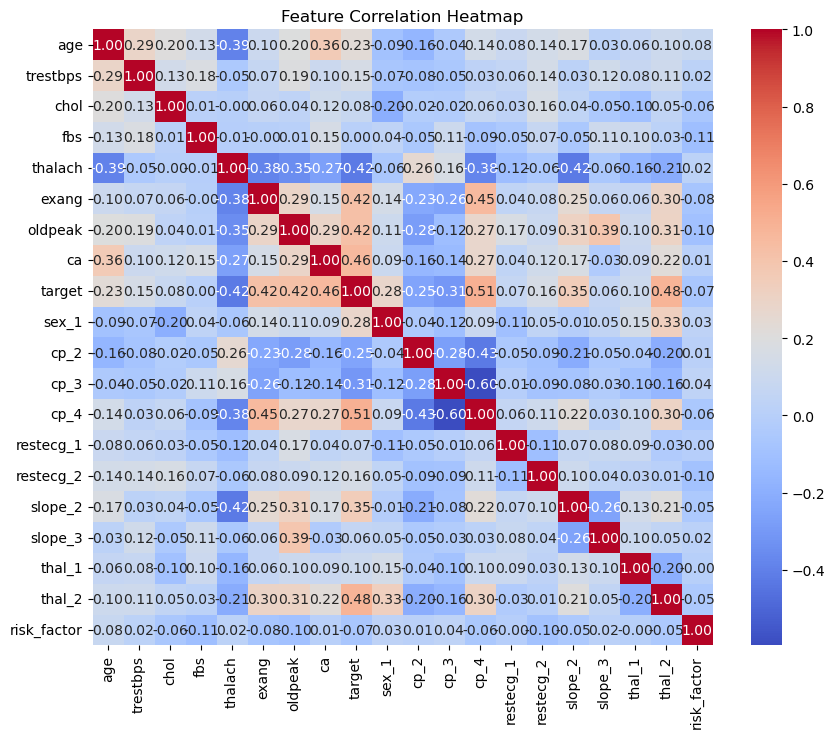

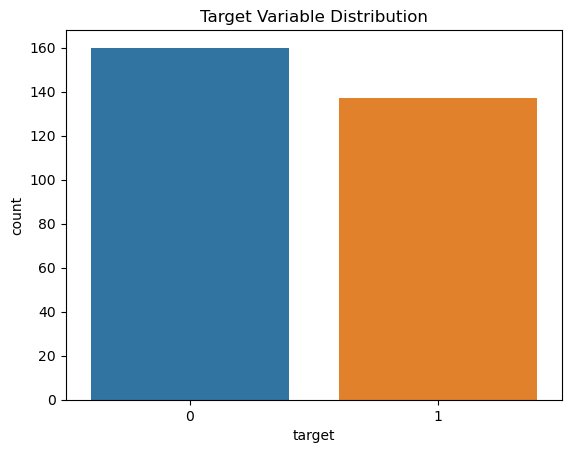

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of the target variable
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()
